In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')


In [2]:
lstm = pd.read_csv('lstm_training_output.csv')
deep_isith = pd.read_csv('deep_isith_training_output.csv')
lstm.head()

,Unnamed: 0,name,loss,acc,iteration,iteration_time,event
0,0,LSTM_EEG,0.707857,0.514731,0,0 days 00:00:13.702586000,HandStart
1,1,LSTM_EEG,0.692100,0.426226,1,0 days 00:00:14.336651000,HandStart
2,2,LSTM_EEG,0.677250,0.375553,2,0 days 00:00:15.652099000,HandStart
3,3,LSTM_EEG,0.660149,0.350755,3,0 days 00:00:15.651659000,HandStart
4,4,LSTM_EEG,0.644333,0.337343,4,0 days 00:00:15.574286000,HandStart


In [3]:
deep_isith.head()

,Unnamed: 0,name,loss,acc,iteration,iteration_time,event
0,0,DeepSITH_Tracker,0.656584,0.410016,0,0 days 00:00:03.792364000,HandStart
1,1,DeepSITH_Tracker,0.640851,0.444853,1,0 days 00:00:02.893636000,HandStart
2,2,DeepSITH_Tracker,0.626341,0.488066,2,0 days 00:00:02.902552000,HandStart
3,3,DeepSITH_Tracker,0.616051,0.527938,3,0 days 00:00:02.899377000,HandStart
4,4,DeepSITH_Tracker,0.602402,0.556371,4,0 days 00:00:02.897613000,HandStart


In [4]:
seconds1 = [float(t[2]) for t in deep_isith['iteration_time'].str.split(':')]
deep_isith['iteration_time'] = seconds1
seconds2 = [float(t[2]) for t in lstm['iteration_time'].str.split(':')]
lstm['iteration_time'] = seconds2

### Plot and compare training time

In [5]:
# Average time to process a minibatch
lstm.groupby('event').agg({'iteration_time':['mean','std']})

iteration_time          
                             mean       std
event                                      
BothReleased            15.617431  0.037178
BothStartLoadPhase      15.596181  0.034825
FirstDigitTouch         15.576872  0.036643
HandStart               15.576683  0.164252
LiftOff                 15.596952  0.037555
Replace                 15.596421  0.036753

In [6]:
# Average time to process a minibatch
deep_isith.groupby('event').agg({'iteration_time':['mean','std']})

iteration_time          
                             mean       std
event                                      
BothReleased             2.917135  0.009105
BothStartLoadPhase       2.916500  0.010461
FirstDigitTouch          2.917507  0.008864
HandStart                2.920721  0.062378
LiftOff                  2.916816  0.010923
Replace                  2.917629  0.008629

### LSTM

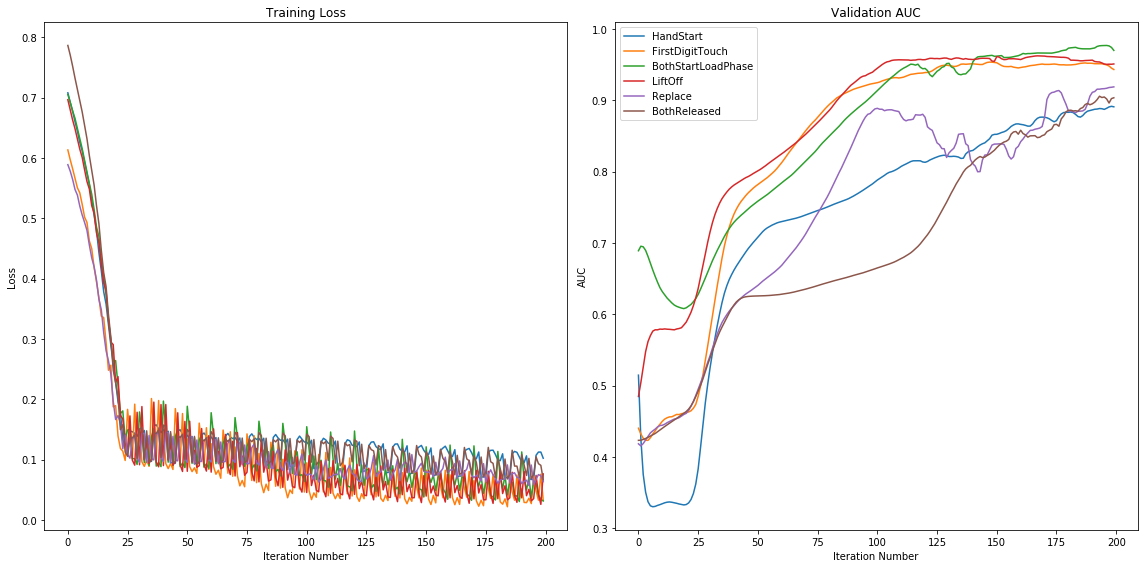

In [7]:
fig = plt.figure(figsize=(16, 8),constrained_layout=False)
event = ['HandStart','FirstDigitTouch','BothStartLoadPhase',
            'LiftOff','Replace','BothReleased']
for i in range(6):
    perf = lstm[lstm['event'] == event[i]]
    # build a dataframe
    loss = np.array(perf['loss'])
    acc = np.array(perf['acc'])
    iteration = np.array(perf['iteration'])
    final_result = pd.DataFrame({'iteration' : iteration,'loss' : loss, 'accuracy' : acc}) 
    final_result.head()
    
    ax = fig.add_subplot(121)
    sn.lineplot(data=final_result, x='iteration', y='loss',
                ax=ax)
    ax.set_xlabel("Iteration Number")
    ax.set_ylabel("Loss")
    ax.set_title("Training Loss")


    ax = fig.add_subplot(122)
    sn.lineplot(data=final_result, x='iteration', y='accuracy', 
                legend='brief', label=event[i], ax=ax)
    ax.set_xlabel("Iteration Number")
    ax.set_ylabel("AUC")
    ax.set_title("Validation AUC")
    plt.tight_layout()

plt.show()

### Deep_iSith

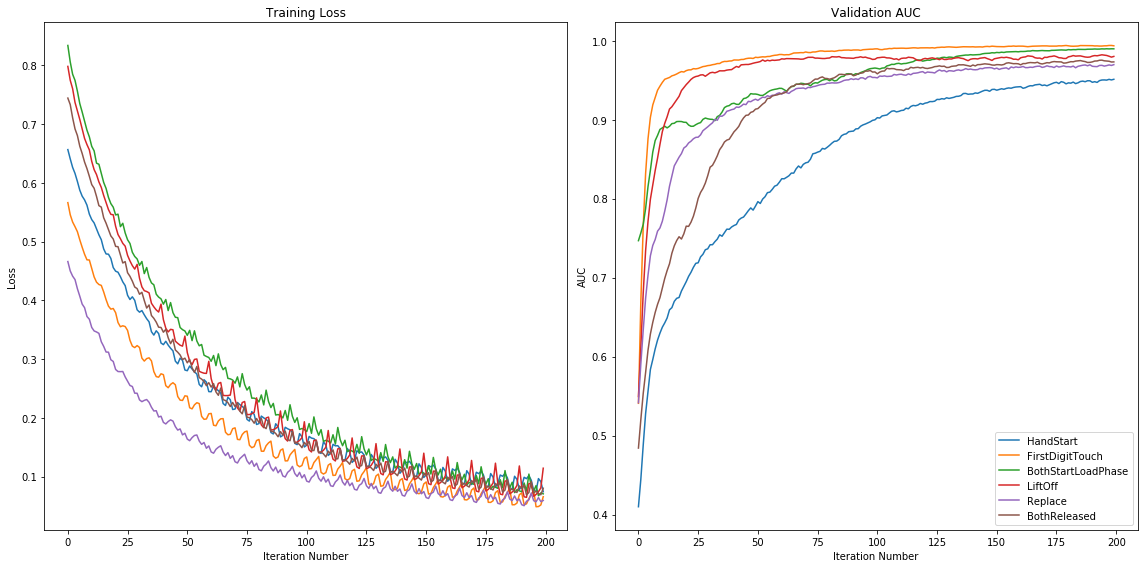

In [8]:
fig = plt.figure(figsize=(16, 8),constrained_layout=False)
event = ['HandStart','FirstDigitTouch','BothStartLoadPhase',
            'LiftOff','Replace','BothReleased']
for i in range(6):
    perf = deep_isith[deep_isith['event'] == event[i]]
    # build a dataframe
    loss = np.array(perf['loss'])
    acc = np.array(perf['acc'])
    iteration = np.array(perf['iteration'])
    final_result = pd.DataFrame({'iteration' : iteration,'loss' : loss, 'accuracy' : acc}) 
    final_result.head()
    
    ax = fig.add_subplot(121)
    sn.lineplot(data=final_result, x='iteration', y='loss',
                ax=ax)
    ax.set_xlabel("Iteration Number")
    ax.set_ylabel("Loss")
    ax.set_title("Training Loss")


    ax = fig.add_subplot(122)
    sn.lineplot(data=final_result, x='iteration', y='accuracy', 
                legend='brief', label=event[i], ax=ax)
    ax.set_xlabel("Iteration Number")
    ax.set_ylabel("AUC")
    ax.set_title("Validation AUC")
    plt.tight_layout()

plt.show()

### Average AUC

In [70]:
# LSTM
last_AUC = lstm.acc.iloc[[199,399,599,799,999,1199]]
lstm_auc = np.mean(last_AUC)
lstm_auc

0.9295069930577249

In [9]:
# Deep_isith
last_AUC = deep_isith.acc.iloc[[199,399,599,799,999,1199]]
deep_isith_auc = np.mean(last_AUC)
deep_isith_auc

0.9762583036843236

In [71]:
lstm.iteration_time.mean()

15.593423421666666

In [10]:
deep_isith.iteration_time.mean()

2.9177178958333334

### Conclusion

| Model | Iteration time (s) | average AUC | 
|---|---|---|
| LSTM | 15.59 | 0.9295 | 
| Deep_iSith | 2.92 | 0.9762 | 
